In [ ]:
with open('grimms.txt', encoding='utf-8', errors='ignore') as f:
    text = f.read()


len(text)

In [ ]:
text[:11]

In [ ]:
import string

allowed = set(string.printable)
text = ''.join(ch for ch in text if ch in allowed)

chars =sorted(set(list(text)))
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for i, ch in enumerate(chars)}

def encode(s):
    return [stoi[c] for c in s]

def decode(l):
    return ''.join([itos[i] for i in l])

vocab_size = len(chars)
print(vocab_size)

In [ ]:
# the brother

for i in range(len(text[:11]) - 1):
    input_char = text[:11][i]
    target_char = text[:11][i + 1]
    print(f"  '{input_char}' → '{target_char}'")

In [5]:
# dataset
xs = []
ys = [] # target

for i in range(len(text) - 1):
    input_char = text[i]
    target_char = text[i + 1]

    xs.append(stoi[input_char])
    ys.append(stoi[target_char])

In [ ]:
# First 5 examples
[(xs[i],itos[xs[i]], ys[i], itos[ys[i]]) for i in range(5)]

In [ ]:
import torch

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs.shape
ys.shape

In [ ]:
# input 
torch.manual_seed(425) # thiet lap ket qua
W = torch.randn((vocab_size, vocab_size), requires_grad=True)
W.shape


In [ ]:
import torch.nn.functional as F

for k in range(100):
    
  # Forward pass
  logits = W[xs] # logits cho toàn bộ dataset
  # counts = logits.exp() # (N, 86), all positive
  # probs = counts / counts.sum(1, keepdims=True)  # (N, 86)
  probs = torch.softmax(logits, dim=1)

  # Loss
  loss = F.cross_entropy(logits, ys)
  print(loss.item())

  # Backward pass
  W.grad = None
  loss.backward()

  # Optimization
  learning_rate = 10 # 0.1,0.2,..=>
  with torch.no_grad():
      W -= learning_rate * W.grad

In [ ]:
# generate
def sample(start_token, length=200):
    out = []
    ix = start_token
    for _ in range(length):
        logits = W[ix]
        probs = torch.softmax(logits, dim=0)
        ix = torch.multinomial(probs, num_samples=1).item()
        out.append(itos[ix])
    return ''.join(out)
print(sample(stoi['T'], 300))

In [ ]:
def inspect(ch, topk=10):
    ix = stoi[ch]
    logits = W[ix]
    probs = torch.softmax(logits, dim=0)
    top = torch.topk(probs, topk)
    for p, i in zip(top.values, top.indices):
        print(f"{ch!r} -> {itos[i.item()]!r}: {p.item():.3f}")
inspect('T')

In [92]:
# find intial good learning rate
lre = torch.linspace(-1, 2, 1000) # 0.1 - 100 
lrs = 10 ** lre

In [ ]:
# loop thu learning rate
# reset weights
W = torch.randn((vocab_size, vocab_size), requires_grad=True)

lri = []
lossi = []

for i in range(1000):
    # minibatch
    ix = torch.randint(0, xs.shape[0], (32,))
    
    # forward
    logits = W[xs[ix]]
    loss = F.cross_entropy(logits, ys[ix])
    
    # backward
    W.grad = None
    loss.backward()
    
    # update với learning rate đang thử
    lr = lrs[i]
    W.data -= lr * W.grad
    
    # lưu lại để vẽ
    lri.append(lre[i].item())
    lossi.append(loss.item())
  
    print(loss.item())


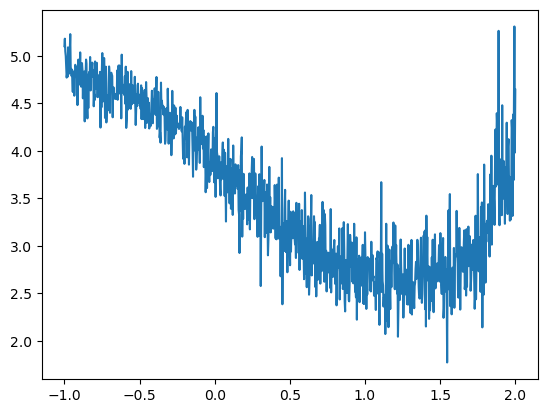

In [94]:
import matplotlib.pyplot as plt
plt.plot(lri, lossi)

In [84]:
# Forward pass
logits = W[xs] # => log_counts
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
probs = torch.softmax(logits, dim=1)

# Loss
import torch.nn.functional as F
loss = F.cross_entropy(logits, ys)

# Backward pass
W.grad = None
loss.backward()

# Optimization
learning_rate = 0.3
with torch.no_grad():
    W -= learning_rate * W.grad

In [ ]:
loss

In [ ]:
# 